#Basic classification: Classify images of clothing

---


https://www.tensorflow.org/tutorials/keras/classification

##init

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.4.1'

##Import the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


label | Class
--- | ---
0 |	T-shirt/top
1 |	Trouser
2 |	Pullover
3 |	Dress
4 |	Coat
5 |	Sandal
6 |	Shirt
7 |	Sneaker
8 |	Bag
9 |	Ankle boot

---

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

##Preprocess the data

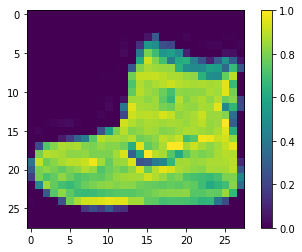

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

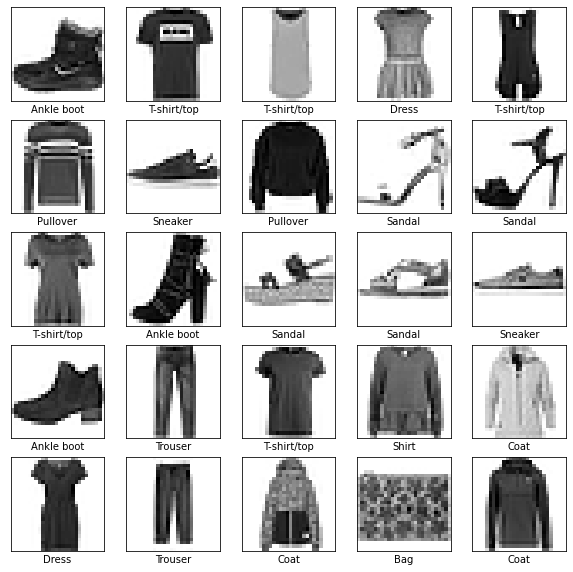

In [15]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

##Build the model

###Set up the layers

In [17]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

###Compile the model



*   Loss function - This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction
*   Optimizer - This is how the model is updated based on the data it sees and its loss function.
*   Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.



In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##Train the model

###Feed the model

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6320 - accuracy: 0.7825
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3866 - accuracy: 0.8611
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3419 - accuracy: 0.8745
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3166 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2919 - accuracy: 0.8934
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2546 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

###Evaluate accuracy

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3477 - accuracy: 0.8783
Test accuracy: 0.8783000111579895


###make predictions

In [22]:
probability_model = tf.keras.Sequential([
                                         model,
                                         tf.keras.layers.Softmax()
])

In [23]:
predictions = probability_model.predict(test_images)

In [24]:
predictions[0]

array([5.2719420e-06, 9.9275366e-10, 1.8352533e-07, 9.2156700e-09,
       2.2119146e-07, 9.6891733e-04, 5.4816596e-06, 8.6931707e-03,
       6.9410510e-07, 9.9032599e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100 * np.max(predictions_array),
                                       class_names[true_label]),
             color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

###Verify predictions

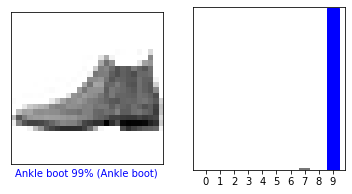

In [31]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

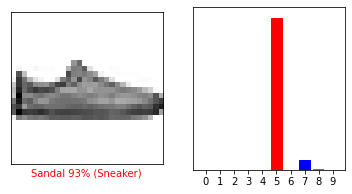

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

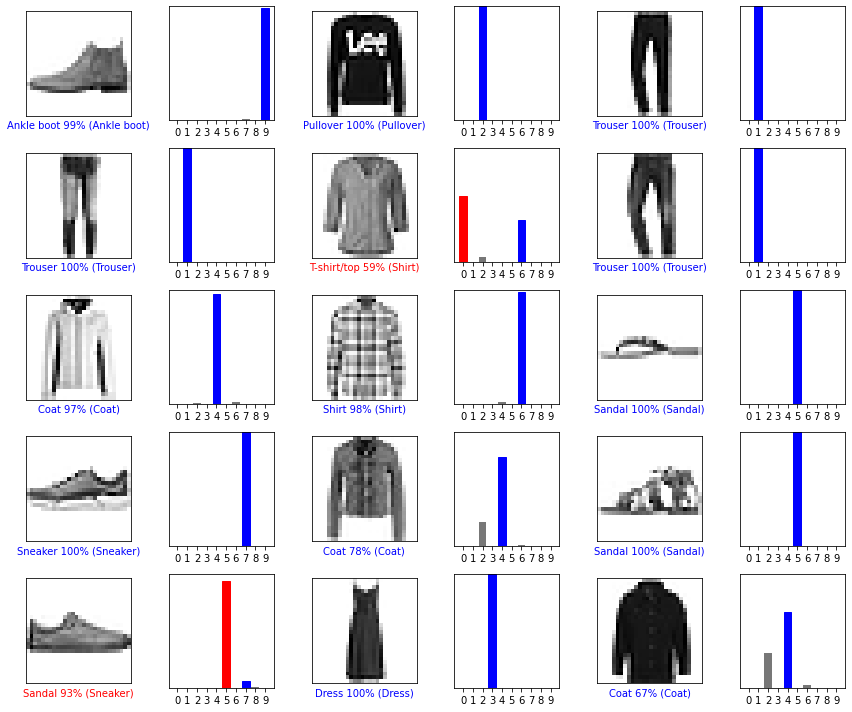

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions[i], test_labels)
  
plt.tight_layout()
plt.show()

##Use the trained model

In [35]:
img = test_images[1]

img.shape

(28, 28)

In [36]:
img = (np.expand_dims(img, 0))

img.shape

(1, 28, 28)

In [38]:
predictions_single = probability_model.predict(img)

predictions_single

array([[1.24525295e-05, 9.14460294e-14, 9.99772966e-01, 1.45100002e-12,
        1.56432026e-04, 1.30256845e-14, 5.81351560e-05, 2.52413615e-20,
        1.62741348e-11, 4.13697219e-18]], dtype=float32)

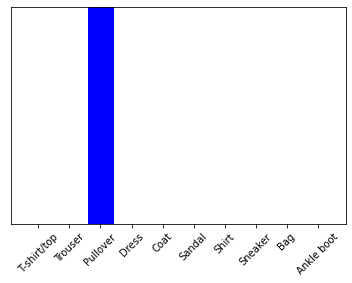

In [39]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(predictions_single[0])

2